In [127]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [128]:
ds=pd.read_csv("tele_churn.csv")
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [129]:
ds.shape

(7043, 21)

In [130]:
ds.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [131]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [132]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is a mixture of data are present (Int,Object,Float)

In [133]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [134]:
ds["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In this we can see that the datas are highly imbalanced

In [135]:
ds["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [136]:
ds.loc[ds["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [137]:
ds["TotalCharges"]=ds["TotalCharges"].replace(" ",np.nan)

In [138]:
ds.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [171]:
ds["TotalCharges"]=ds["TotalCharges"].astype(float)

In [172]:
ds["TotalCharges"]=ds["TotalCharges"].fillna(np.mean(ds["TotalCharges"]))

In [175]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Replaced NAN value with mean value 

There is no null value in given data set

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

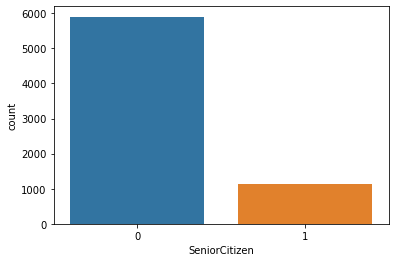

In [139]:
sb.countplot(ds["SeniorCitizen"])

<AxesSubplot:xlabel='Partner', ylabel='count'>

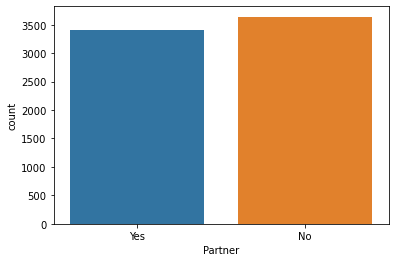

In [140]:
sb.countplot(ds["Partner"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

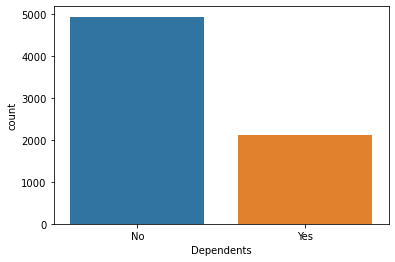

In [141]:
sb.countplot(ds["Dependents"])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

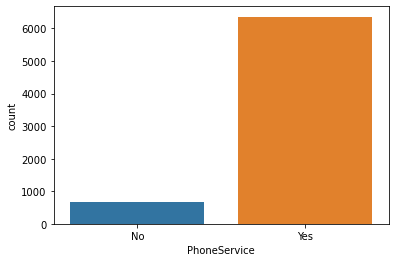

In [142]:
sb.countplot(ds["PhoneService"])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

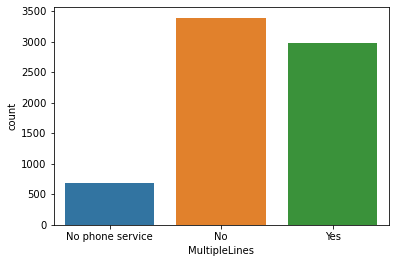

In [143]:
sb.countplot(ds["MultipleLines"])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

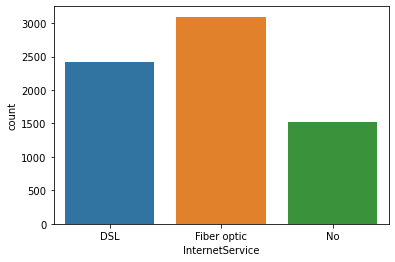

In [144]:
sb.countplot(ds["InternetService"])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

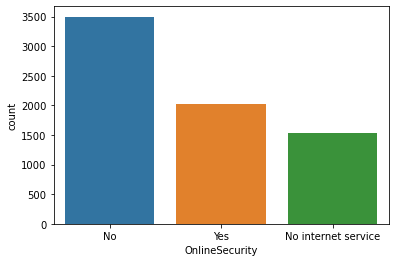

In [145]:
sb.countplot(ds["OnlineSecurity"])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

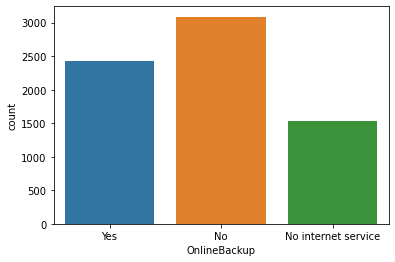

In [146]:
sb.countplot(ds["OnlineBackup"])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

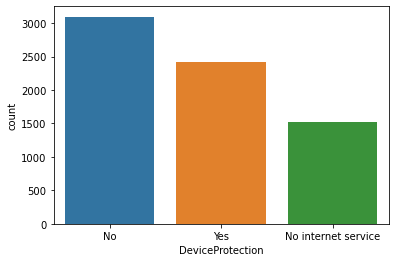

In [147]:
sb.countplot(ds["DeviceProtection"])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

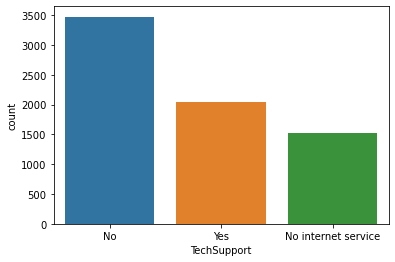

In [148]:
sb.countplot(ds["TechSupport"])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

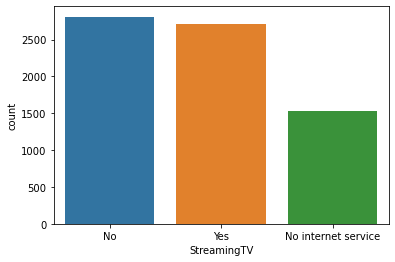

In [149]:
sb.countplot(ds["StreamingTV"])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

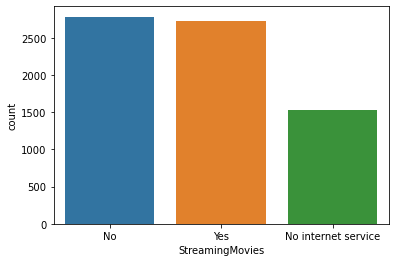

In [150]:
sb.countplot(ds["StreamingMovies"])

<AxesSubplot:xlabel='Contract', ylabel='count'>

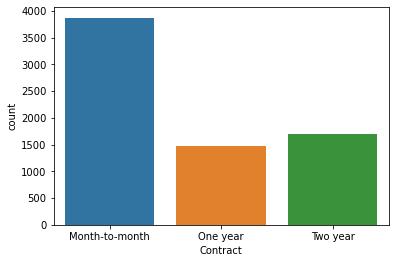

In [151]:
sb.countplot(ds["Contract"])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

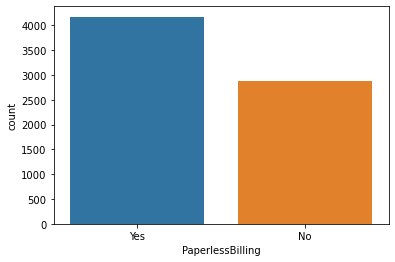

In [152]:
sb.countplot(ds["PaperlessBilling"])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

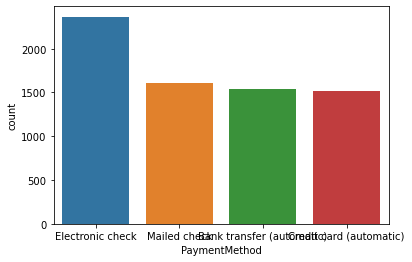

In [153]:
sb.countplot(ds["PaymentMethod"])

In [154]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Visualaztion for object type data

In [179]:
visual=ds[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [180]:
visual.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Male      3555
Female    3488
Name: gender, dtype: int64


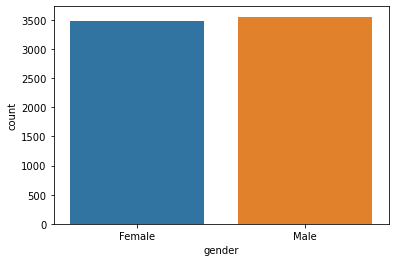

In [181]:
ax=sb.countplot(x="gender",data=visual)
print(visual["gender"].value_counts())

from this visual we came to know there are 3555 male and 3488 feamle customer

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


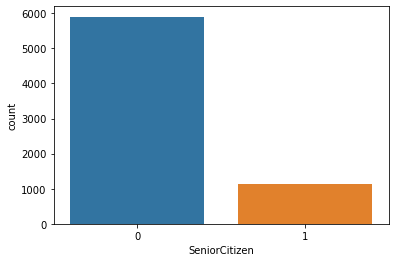

In [184]:
ax=sb.countplot(x='SeniorCitizen',data=visual)
print(visual["SeniorCitizen"].value_counts())

From this observation we see that younger customers are 5901 and senior citizens are 1142

No     3641
Yes    3402
Name: Partner, dtype: int64


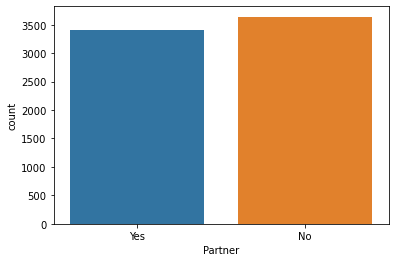

In [185]:
ax=sb.countpl  ot(x='Partner',data=visual)
print(visual["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


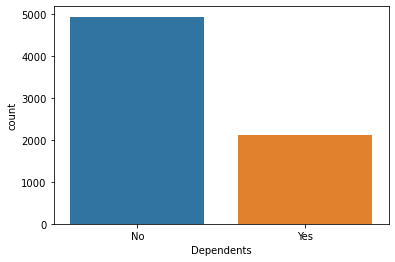

In [186]:
ax=sb.countplot(x='Dependents',data=visual)
print(visual["Dependents"].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


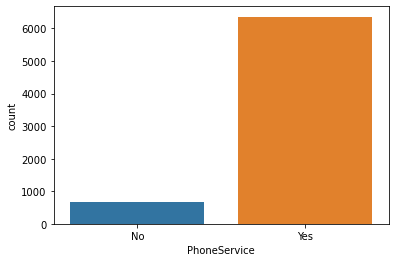

In [187]:
ax=sb.countplot(x='PhoneService',data=visual)
print(visual["PhoneService"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


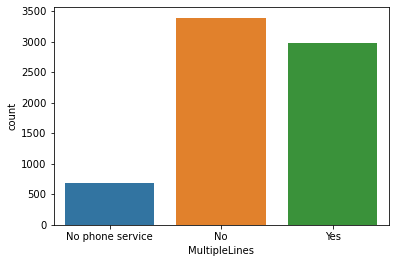

In [188]:
ax=sb.countplot(x='MultipleLines',data=visual)
print(visual["MultipleLines"].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


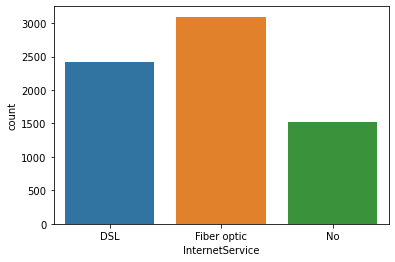

In [189]:
ax=sb.countplot(x='InternetService',data=visual)
print(visual["InternetService"].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


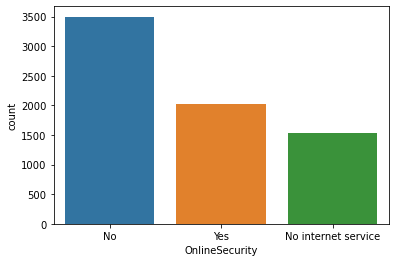

In [190]:
ax=sb.countplot(x='OnlineSecurity',data=visual)
print(visual["OnlineSecurity"].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


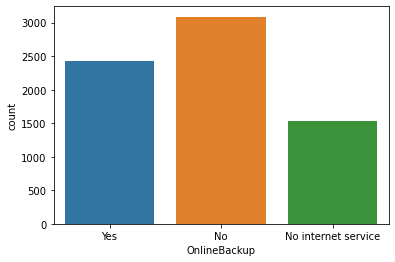

In [191]:
ax=sb.countplot(x='OnlineBackup',data=visual)
print(visual["OnlineBackup"].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


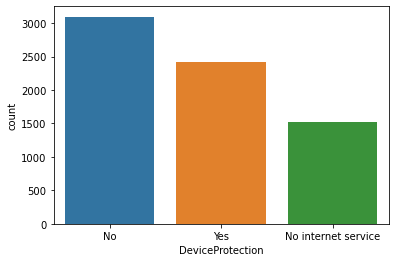

In [192]:
ax=sb.countplot(x='DeviceProtection',data=visual)
print(visual["DeviceProtection"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


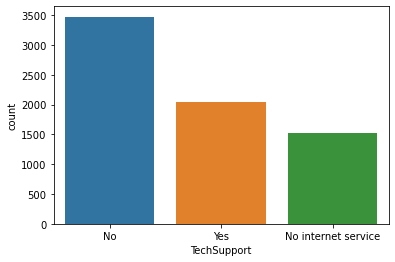

In [193]:
ax=sb.countplot(x='TechSupport',data=visual)
print(visual["TechSupport"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


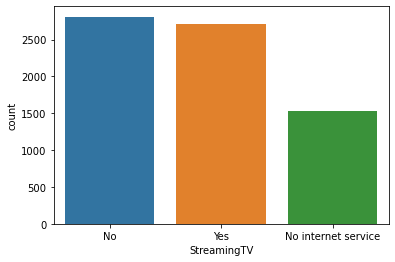

In [194]:
ax=sb.countplot(x='StreamingTV',data=visual)
print(visual["StreamingTV"].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


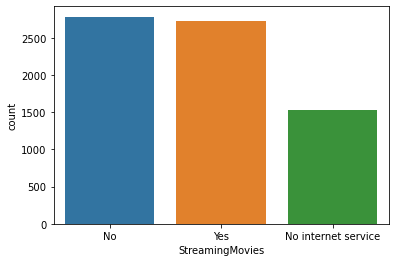

In [195]:
ax=sb.countplot(x='StreamingMovies',data=visual)
print(visual["StreamingMovies"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


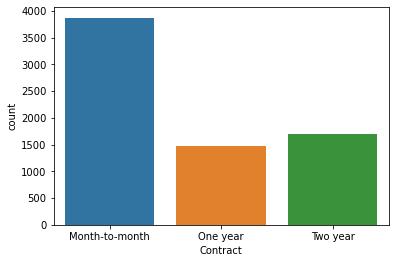

In [196]:
ax=sb.countplot(x='Contract',data=visual)
print(visual["Contract"].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


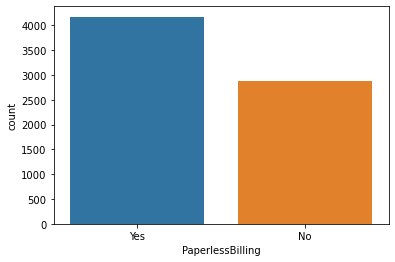

In [197]:
ax=sb.countplot(x='PaperlessBilling',data=visual)
print(visual["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


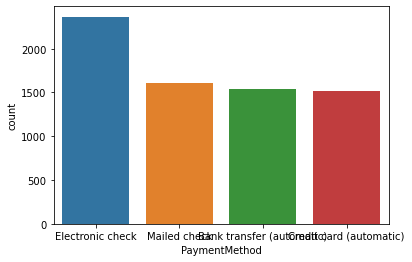

In [198]:
ax=sb.countplot(x='PaymentMethod',data=visual)
print(visual["PaymentMethod"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


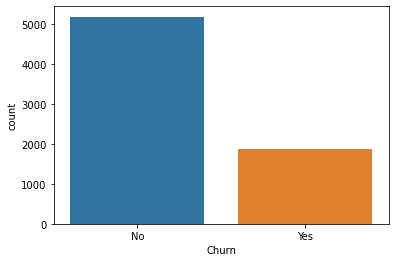

In [199]:
ax=sb.countplot(x='Churn',data=visual)
print(visual["Churn"].value_counts())

# Visualization of ordinal data

In [200]:
 ordinal=ds[["customerID", "tenure"]].copy()

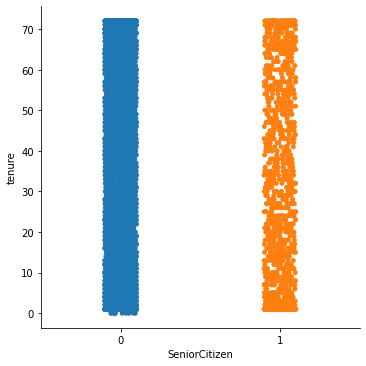

In [203]:
sb.catplot(x="SeniorCitizen",y="tenure",data=ds)

# Distribution for Continous value

In [206]:
con=ds[["MonthlyCharges","TotalCharges"]].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

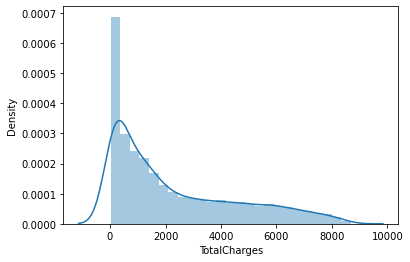

In [207]:
sb.distplot(con["TotalCharges"],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

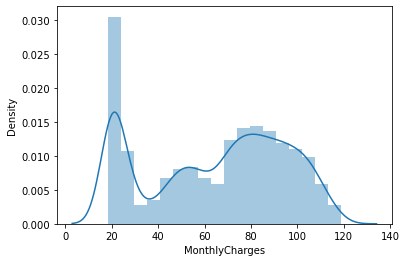

In [208]:
sb.distplot(con["MonthlyCharges"],kde=True)

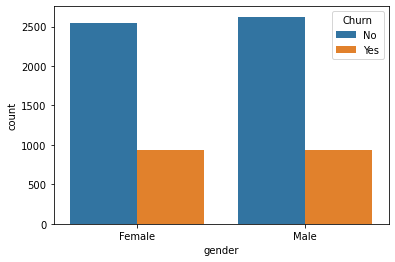

In [155]:
sb.countplot(x="gender",hue="Churn",data=ds)
plt.show()

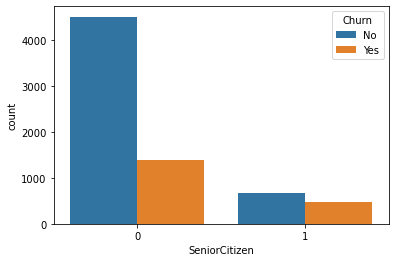

In [156]:
sb.countplot(x="SeniorCitizen",hue="Churn",data=ds)
plt.show()

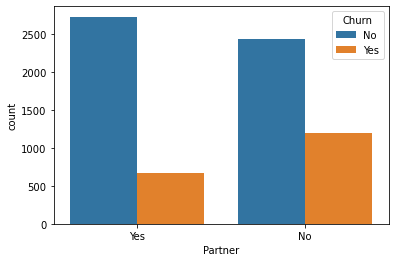

In [157]:
sb.countplot(x="Partner",hue="Churn",data=ds)
plt.show()

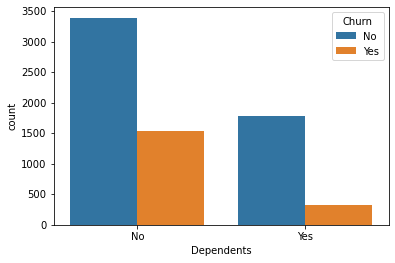

In [158]:
sb.countplot(x="Dependents",hue="Churn",data=ds)
plt.show()

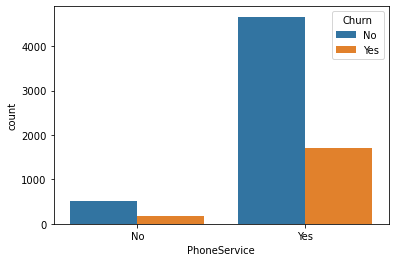

In [159]:
sb.countplot(x="PhoneService",hue="Churn",data=ds)
plt.show()

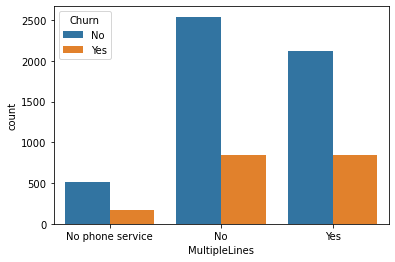

In [160]:
sb.countplot(x="MultipleLines",hue="Churn",data=ds)
plt.show()

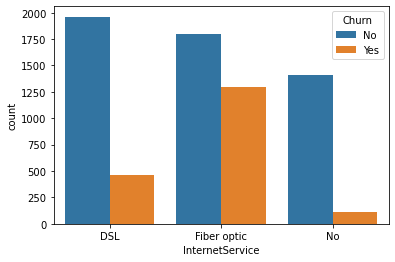

In [161]:
sb.countplot(x="InternetService",hue="Churn",data=ds)
plt.show()

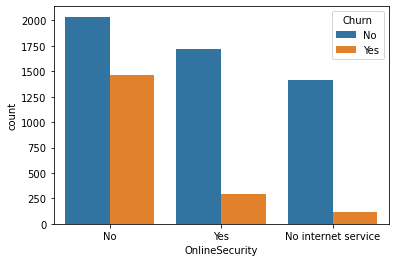

In [162]:
sb.countplot(x="OnlineSecurity",hue="Churn",data=ds)
plt.show()

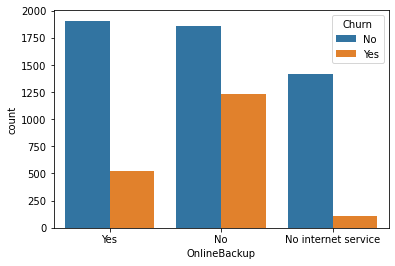

In [163]:
sb.countplot(x="OnlineBackup",hue="Churn",data=ds)
plt.show()

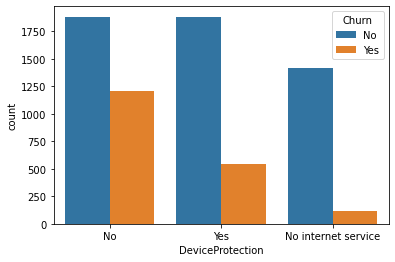

In [164]:
sb.countplot(x="DeviceProtection",hue="Churn",data=ds)
plt.show()

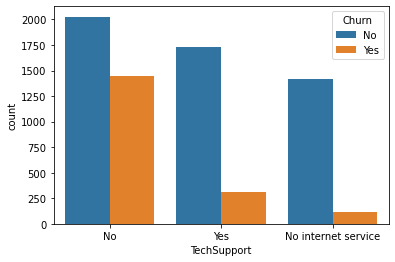

In [165]:
sb.countplot(x="TechSupport",hue="Churn",data=ds)
plt.show()

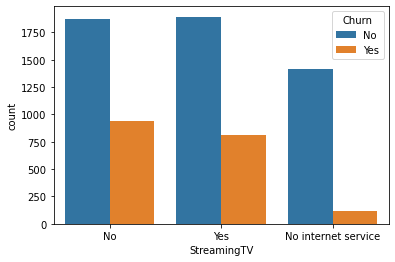

In [166]:
sb.countplot(x="StreamingTV",hue="Churn",data=ds)
plt.show()

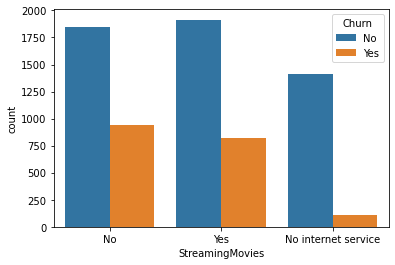

In [167]:
sb.countplot(x="StreamingMovies",hue="Churn",data=ds)
plt.show()

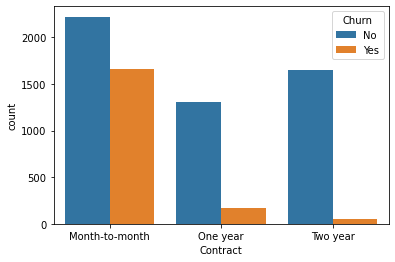

In [168]:
sb.countplot(x="Contract",hue="Churn",data=ds)
plt.show()

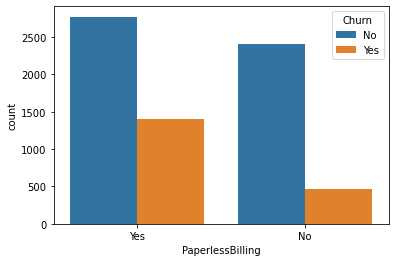

In [169]:
sb.countplot(x="PaperlessBilling",hue="Churn",data=ds)
plt.show()

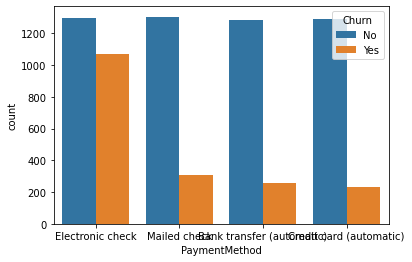

In [170]:
sb.countplot(x="PaymentMethod",hue="Churn",data=ds)
plt.show()

# Converting Object into float type

In [209]:
from sklearn.preprocessing import OrdinalEncoder
oec=OrdinalEncoder()

In [217]:
for i in ds.columns:
    if ds[i].dtypes=="object":
        ds[i]=oec.fit_transform(ds[i].values.reshape(-1,1))

In [218]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [219]:
ds.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

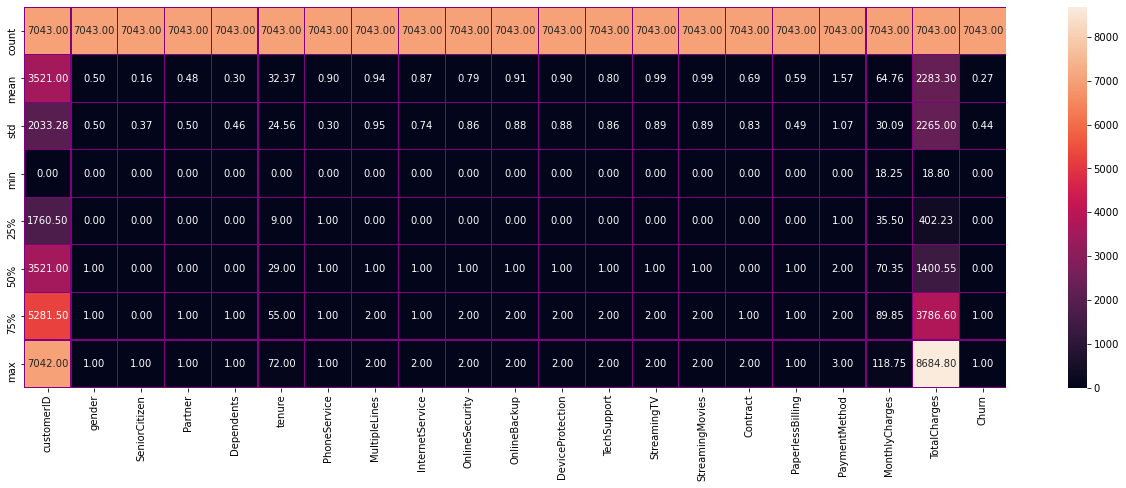

In [221]:
plt.figure(figsize=(22,7))
sb.heatmap(ds.describe(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

In [222]:
ds.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

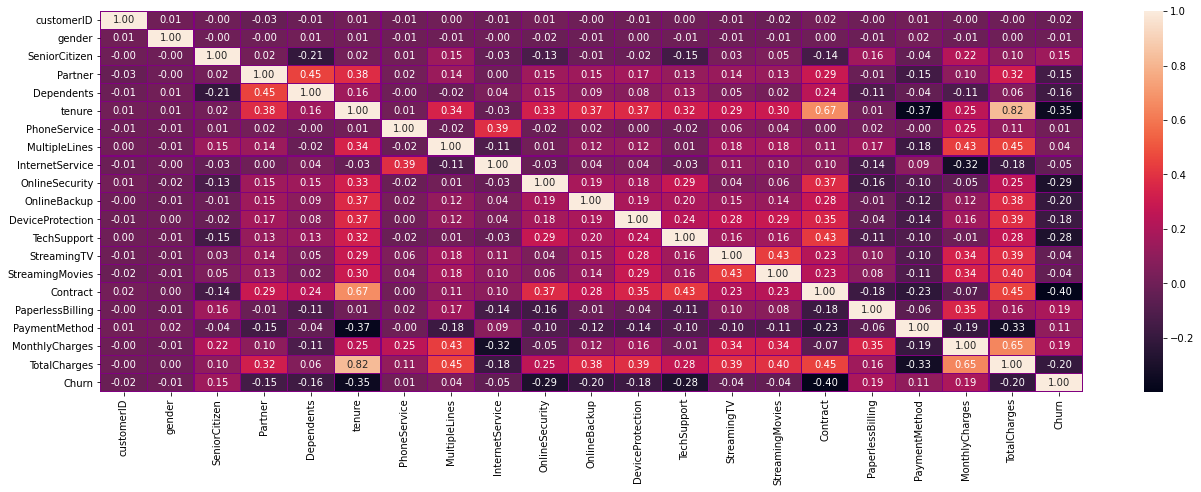

In [223]:
plt.figure(figsize=(22,7))
sb.heatmap(ds.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

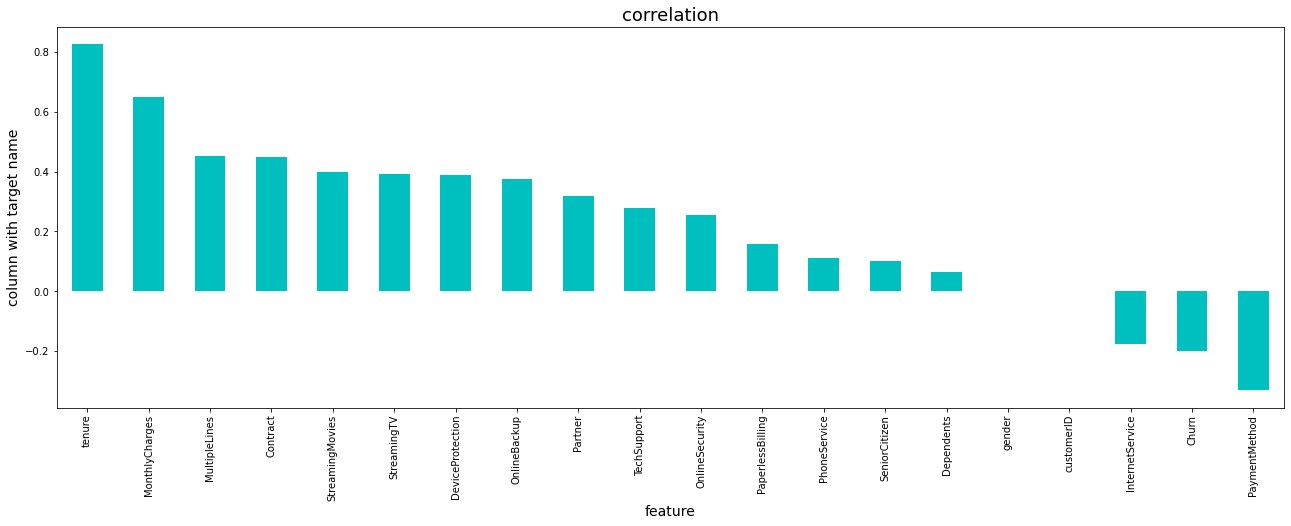

In [227]:
plt.figure(figsize=(22,7))
ds.corr()["TotalCharges"].sort_values(ascending=False).drop(["TotalCharges"]).plot(kind="bar",color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target name",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

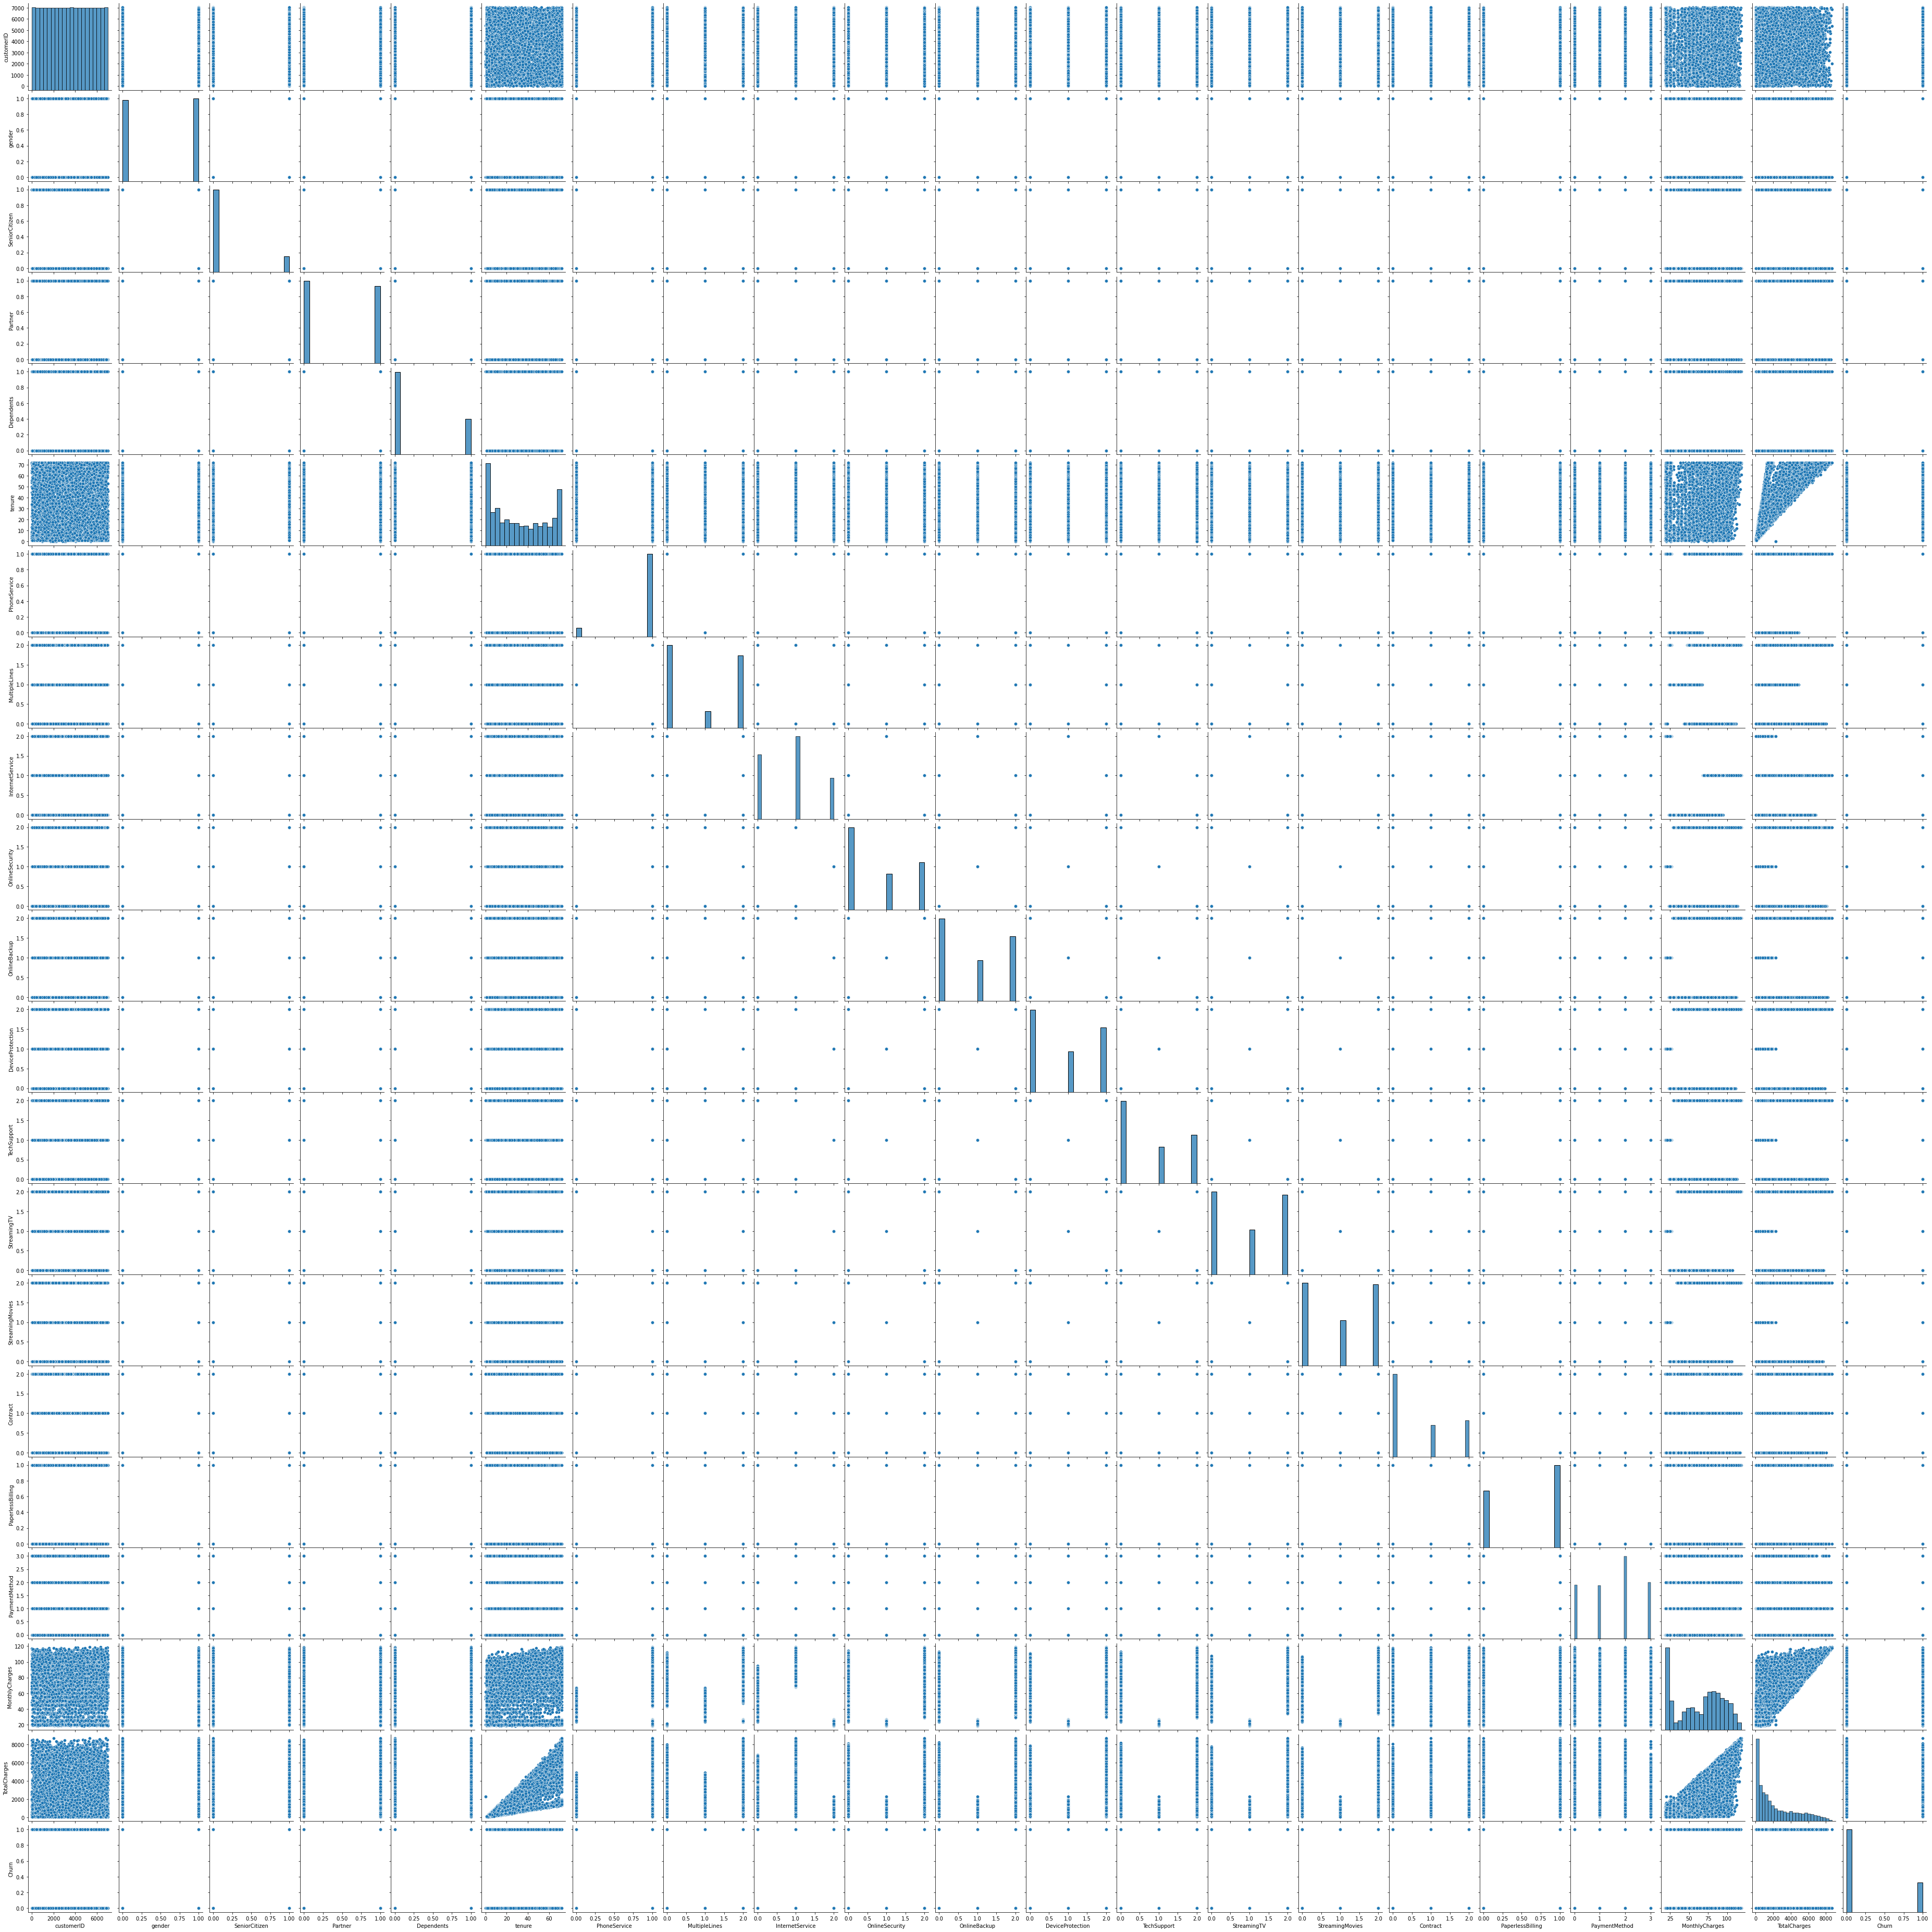

In [291]:
sb.pairplot(ds)

In [228]:
ds.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

There is no skweness avail in the given dataset, we not going to treat any value

# Outliers check

In [229]:
ds.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

customerID           AxesSubplot(0.125,0.8498;0.775x0.0302)
gender              AxesSubplot(0.125,0.81356;0.775x0.0302)
SeniorCitizen       AxesSubplot(0.125,0.77732;0.775x0.0302)
Partner             AxesSubplot(0.125,0.74108;0.775x0.0302)
Dependents          AxesSubplot(0.125,0.70484;0.775x0.0302)
tenure               AxesSubplot(0.125,0.6686;0.775x0.0302)
PhoneService        AxesSubplot(0.125,0.63236;0.775x0.0302)
MultipleLines       AxesSubplot(0.125,0.59612;0.775x0.0302)
InternetService     AxesSubplot(0.125,0.55988;0.775x0.0302)
OnlineSecurity      AxesSubplot(0.125,0.52364;0.775x0.0302)
OnlineBackup         AxesSubplot(0.125,0.4874;0.775x0.0302)
DeviceProtection    AxesSubplot(0.125,0.45116;0.775x0.0302)
TechSupport         AxesSubplot(0.125,0.41492;0.775x0.0302)
StreamingTV         AxesSubplot(0.125,0.37868;0.775x0.0302)
StreamingMovies     AxesSubplot(0.125,0.34244;0.775x0.0302)
Contract             AxesSubplot(0.125,0.3062;0.775x0.0302)
PaperlessBilling    AxesSubplot(0.125,0.

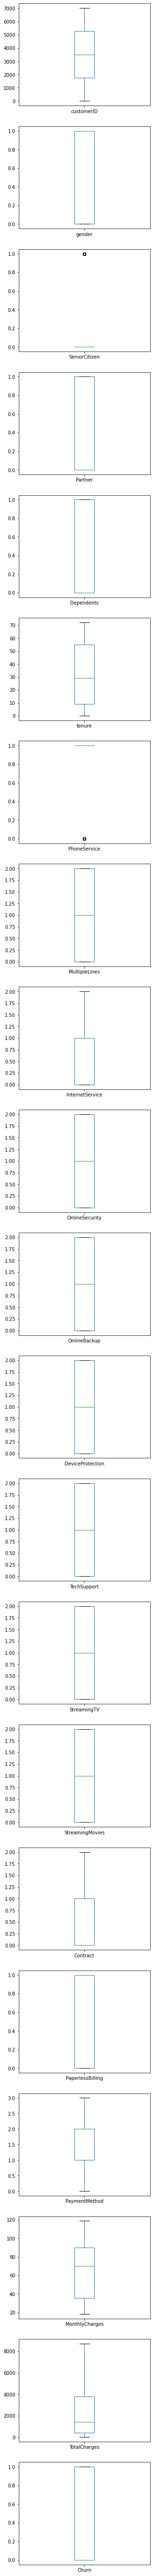

In [239]:
ds.plot(kind="box",subplots=True,figsize=(5,100),layout=(21,1))

since senior citizen is categorical value there dont need to remove the outliers

In [241]:
ds.shape

(7043, 21)

In [242]:
x=ds.drop("TotalCharges",axis=1)
y=ds["TotalCharges"]

# Scaling the data 

In [245]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [249]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At the random state {i}, the Training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At the random state {i}, the Testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At the random state 0, the Training accuracy is :- 0.9058706722803964
At the random state 0, the Testing accuracy is :- 0.8977317673785854


At the random state 1, the Training accuracy is :- 0.9052277082152647
At the random state 1, the Testing accuracy is :- 0.9003132716690803


At the random state 2, the Training accuracy is :- 0.9056858398935238
At the random state 2, the Testing accuracy is :- 0.8984735750686543


At the random state 3, the Training accuracy is :- 0.9044956724241888
At the random state 3, the Testing accuracy is :- 0.9032713403489678


At the random state 4, the Training accuracy is :- 0.9031354749784841
At the random state 4, the Testing accuracy is :- 0.9085937883962479


At the random state 5, the Training accuracy is :- 0.9026338340566922
At the random state 5, the Testing accuracy is :- 0.9101290251842342


At the random state 6, the Training accuracy is :- 0.9028087364691222
At the random state 6, the Testing accuracy is :- 0.9097783155230829


At the random

At the random state 63, the Training accuracy is :- 0.9048964501700321
At the random state 63, the Testing accuracy is :- 0.9014758874088666


At the random state 64, the Training accuracy is :- 0.9045170165947284
At the random state 64, the Testing accuracy is :- 0.9031967303238562


At the random state 65, the Training accuracy is :- 0.9045009415426986
At the random state 65, the Testing accuracy is :- 0.9032852823020271


At the random state 66, the Training accuracy is :- 0.9064055684861096
At the random state 66, the Testing accuracy is :- 0.8953698509727254


At the random state 67, the Training accuracy is :- 0.9057993770221395
At the random state 67, the Testing accuracy is :- 0.898050834773779


At the random state 68, the Training accuracy is :- 0.9044724983486806
At the random state 68, the Testing accuracy is :- 0.9035221768135269


At the random state 69, the Training accuracy is :- 0.9034855875244499
At the random state 69, the Testing accuracy is :- 0.9071884489486348




In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [251]:
lr.fit(x_train,y_train)

LinearRegression()

In [252]:
pred_test=lr.predict(x_test)

In [254]:
print(r2_score(y_test,pred_test))

0.9042173834952025


Cross Validation of the model

In [256]:
from sklearn.model_selection import cross_val_score


In [262]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At the cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At the cross fold2 the cv score is 0.9033382537767015 and accuracy score for training is -0.8911218980191142 and accuracy for the testing is 0.9042173834952025


At the cross fold3 the cv score is 0.9037012261875313 and accuracy score for training is -0.8911218980191142 and accuracy for the testing is 0.9042173834952025


At the cross fold4 the cv score is 0.9037044584134895 and accuracy score for training is -0.8911218980191142 and accuracy for the testing is 0.9042173834952025


At the cross fold5 the cv score is 0.9036665825623267 and accuracy score for training is -0.8911218980191142 and accuracy for the testing is 0.9042173834952025


At the cross fold6 the cv score is 0.9037349024389361 and accuracy score for training is -0.8911218980191142 and accuracy for the testing is 0.9042173834952025


At the cross fold7 the cv score is 0.9035677539347998 and accuracy score for training is -0.8911218980191142 and accuracy for the testing is 0.9042173834952025


At the cross fold8 the cv sc

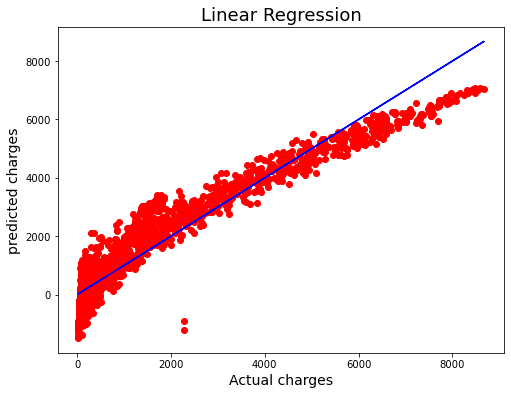

In [264]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual charges",fontsize=14)
plt.ylabel("predicted charges", fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Regularization

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

In [273]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [275]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9042026267132481

In [277]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9036629382160928

Ensemble Technique

In [278]:
from sklearn.ensemble import RandomForestRegressor


In [280]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [282]:
rfr=RandomForestRegressor(criterion="mse",max_features="auto")
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()  
print("Cross Val Score",rfc*100)

R2 Score 99.88624344642439
Cross Val Score 99.8734185361364


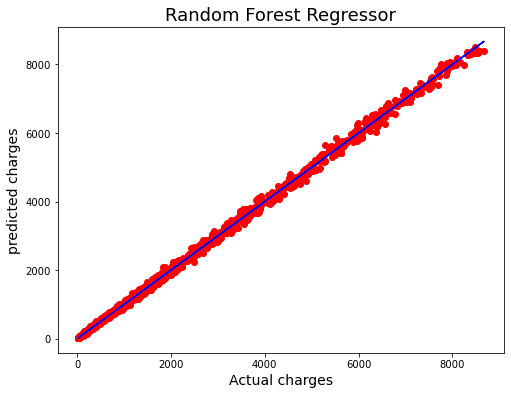

In [293]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual charges",fontsize=14)
plt.ylabel("predicted charges", fontsize=14)
plt.title("Random Forest Regressor",fontsize=18)
plt.show()

In [284]:
import pickle
filename="churn.pkl"
pickle.dump(rfr,open(filename,"wb"))


In [287]:
loaded_model=pickle.load(open('churn.pkl',"rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.9988624344642439


In [290]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
predicted,901.3975,3000.9315,1646.598,1660.3605,3723.5955,65.424,942.3955,504.75,5469.0945,186.0105,...,4203.412,7821.0405,2644.2385,806.8295,577.076,404.9835,3117.807,70.097,1265.3895,523.8555
Original,901.3975,3000.9315,1646.598,1660.3605,3723.5955,65.424,942.3955,504.75,5469.0945,186.0105,...,4203.412,7821.0405,2644.2385,806.8295,577.076,404.9835,3117.807,70.097,1265.3895,523.8555
